In [ ]:
!pip install graphviz dtreeviz # Jika dijalankan di Google Colab
import warnings; warnings.simplefilter('ignore')
import pandas as pd, matplotlib.pyplot as plt
import time, numpy as np, seaborn as sns
from sklearn import  tree
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
#from dtreeviz.trees import *
#import graphviz
from sklearn import svm, preprocessing
from sklearn.gaussian_process.kernels import RBF
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
sns.set(style="ticks", color_codes=True)
"Done"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 3.2 MB/s eta 0:00:00


'Done'

#Data Preparation

In [ ]:
# Load data Bunga Iris
data = sns.load_dataset("iris")
print(data.shape)
data.sample(5)

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
10,5.4,3.7,1.5,0.2,setosa
37,4.9,3.6,1.4,0.1,setosa
102,7.1,3.0,5.9,2.1,virginica
81,5.5,2.4,3.7,1.0,versicolor
96,5.7,2.9,4.2,1.3,versicolor


In [ ]:
data['species'] = data['species'].astype('category')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   sepal_length  150 non-null    float64 
 1   sepal_width   150 non-null    float64 
 2   petal_length  150 non-null    float64 
 3   petal_width   150 non-null    float64 
 4   species       150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB
None


In [ ]:
print("Duplikasi = ", data.duplicated().sum())
print(data.isnull().sum())

Duplikasi =  1
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [ ]:
data.drop_duplicates(keep="first", inplace=True)
print("Duplikasi = ", data.duplicated().sum())

Duplikasi =  0


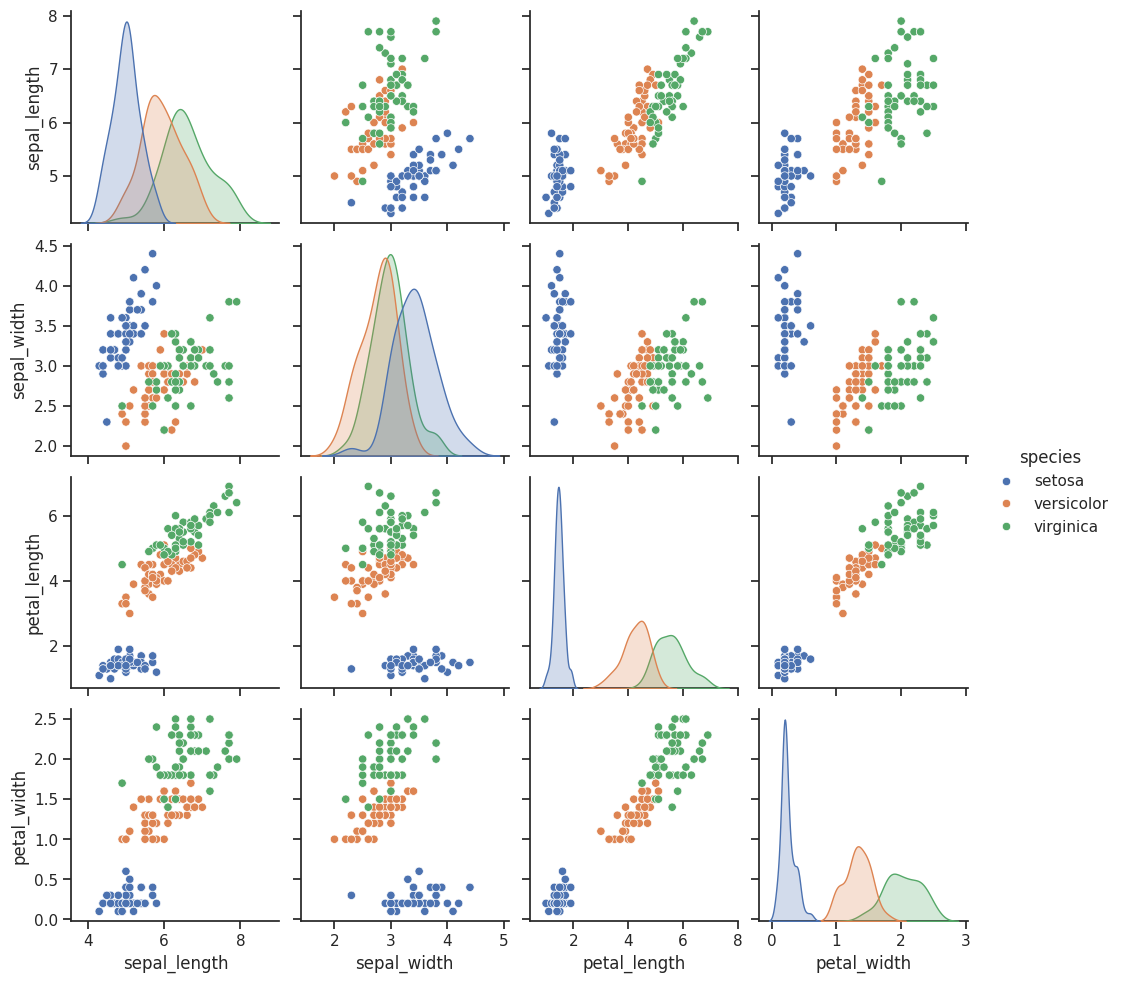

In [ ]:
p = sns.pairplot(data, hue="species")

In [ ]:
# Kita membuat dataframe baru, hati-hati jika datanya besar.
df1 = data[['sepal_length','sepal_width','petal_length','petal_width']]
y1 = data['species']
df1.shape, y1.shape

((149, 4), (149,))

In [ ]:
df1_train, df1_test, y1_train, y1_test = train_test_split(df1, y1, test_size=0.3, random_state=33)
print(df1_train.shape, df1_test.shape)

(104, 4) (45, 4)


#Pemodelan

##kNN

In [ ]:
# k-NN: http://scikit-learn.org/stable/modules/neighbors.html
n_neighbors = 3
weights = 'distance'
kNN = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
kNN.fit(df1_train, y1_train)
print('Done!')

Done!


In [ ]:
# Prediksi dengan k-NN
y_kNN1 = kNN.predict(df1_test)
y_kNN1[-10:]

array(['virginica', 'virginica', 'versicolor', 'versicolor', 'setosa',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'setosa'],
      dtype=object)

In [ ]:
print("Kasus 01 - Bunga Iris: kNN")
print(confusion_matrix(y1_test, y_kNN1))
print(classification_report(y1_test, y_kNN1))

Kasus 01 - Bunga Iris: kNN
[[11  0  0]
 [ 0 15  0]
 [ 0  2 17]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.88      1.00      0.94        15
   virginica       1.00      0.89      0.94        19

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



##Regresi Logistik

In [ ]:
reglog = LogisticRegression().fit(df1_train, y1_train)
y_reglog1 = reglog.predict(df1_test)
print("Kasus 01 - Bunga Iris: Regresi Logistik")
print(confusion_matrix(y1_test, y_reglog1))
print(classification_report(y1_test, y_reglog1))

Kasus 01 - Bunga Iris: Regresi Logistik
[[11  0  0]
 [ 0 15  0]
 [ 0  3 16]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.83      1.00      0.91        15
   virginica       1.00      0.84      0.91        19

    accuracy                           0.93        45
   macro avg       0.94      0.95      0.94        45
weighted avg       0.94      0.93      0.93        45



##Naive Bayes

In [ ]:
# Naive Bayes: http://scikit-learn.org/stable/modules/naive_bayes.html

gnb = GaussianNB()
nbc = gnb.fit(df1_train, y1_train)
y_nb1 = nbc.predict(df1_test)

print(confusion_matrix(y1_test, y_nb1))
print(classification_report(y1_test, y_nb1))

[[11  0  0]
 [ 0 15  0]
 [ 0  2 17]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.88      1.00      0.94        15
   virginica       1.00      0.89      0.94        19

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



##Decision Tree

In [ ]:
# Decision Tree: http://scikit-learn.org/stable/modules/tree.html
DT = tree.DecisionTreeClassifier()
# Sengaja menggunakan default parameter, (Hyper)parameter Optimization akan dibahas kemudian
DT = DT.fit(df1_train, y1_train)
y_DT1 = DT.predict(df1_test)

print(confusion_matrix(y1_test, y_DT1))
print(classification_report(y1_test, y_DT1))

[[11  0  0]
 [ 0 15  0]
 [ 0  4 15]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.79      1.00      0.88        15
   virginica       1.00      0.79      0.88        19

    accuracy                           0.91        45
   macro avg       0.93      0.93      0.92        45
weighted avg       0.93      0.91      0.91        45



In [ ]:
# Varible importance - Salah satu kelebihan Decision Tree
DT.feature_importances_

array([0.        , 0.01933984, 0.60633582, 0.37432434])

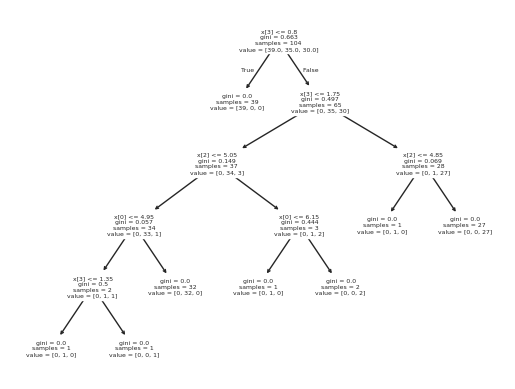

In [ ]:
clf = tree.DecisionTreeClassifier(random_state=0)
clf = clf.fit(df1_train, y1_train)
p = tree.plot_tree(clf)

##Random Forest

In [ ]:
# Mari coba perbaiki dengan Random Forest
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
rf = RandomForestClassifier()
rf.fit(df1_train, y1_train)
y_rf1 = rf.predict(df1_test)

print(confusion_matrix(y1_test, y_rf1))
print(classification_report(y1_test, y_rf1))

[[11  0  0]
 [ 0 15  0]
 [ 0  3 16]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.83      1.00      0.91        15
   virginica       1.00      0.84      0.91        19

    accuracy                           0.93        45
   macro avg       0.94      0.95      0.94        45
weighted avg       0.94      0.93      0.93        45



Feature ranking:
1. feature 3 (0.474235)
2. feature 2 (0.416058)
3. feature 0 (0.084471)
4. feature 1 (0.025236)


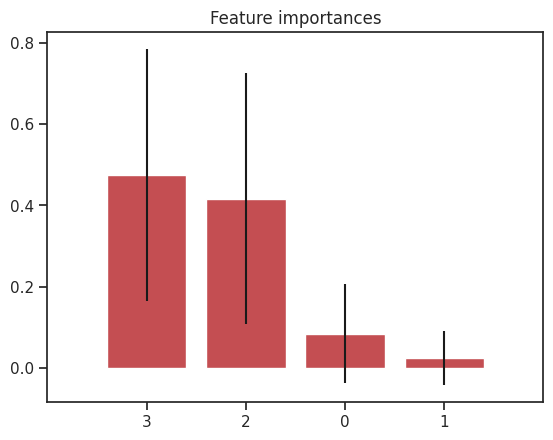

In [ ]:
# Varible importance
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(df1.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(df1.shape[1]), importances[indices],color="r", yerr=std[indices], align="center")
plt.xticks(range(df1.shape[1]), indices)
plt.xlim([-1, df1.shape[1]])
plt.show()

##SVM

In [ ]:
# Fitting and evaluate the model
dSVM = svm.SVC(C = 10**5, kernel = 'linear')#Misal menggunakan kernel Linear

dSVM.fit(df1_train, y1_train)
y_SVM1 = dSVM.predict(df1_test)

print(confusion_matrix(y1_test, y_SVM1))
print(classification_report(y1_test, y_SVM1))

[[11  0  0]
 [ 0 15  0]
 [ 0  0 19]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      1.00      1.00        15
   virginica       1.00      1.00      1.00        19

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [ ]:
# The Support Vectors
print('index dr SV-nya: ', dSVM.support_)
print('Vector Datanya: \n', dSVM.support_vectors_)

index dr SV-nya:  [14 41 83  0 12 80 93 15 18 31 42 43 88]
Vector Datanya: 
 [[4.5 2.3 1.3 0.3]
 [5.1 3.8 1.9 0.4]
 [5.1 3.3 1.7 0.5]
 [5.1 2.5 3.  1.1]
 [5.9 3.2 4.8 1.8]
 [6.  2.7 5.1 1.6]
 [6.7 3.  5.  1.7]
 [6.3 2.8 5.1 1.5]
 [7.2 3.  5.8 1.6]
 [6.1 3.  4.9 1.8]
 [6.5 3.2 5.1 2. ]
 [6.3 2.7 4.9 1.8]
 [4.9 2.5 4.5 1.7]]


In [ ]:
# Model Weights for interpretations
print('w = ',dSVM.coef_)
print('b = ',dSVM.intercept_)

w =  [[-0.04630589  0.52106895 -1.00301941 -0.46411937]
 [ 0.04017805  0.17410509 -0.55713561 -0.2437469 ]
 [ 3.7172828   3.70419479 -7.34998052 -8.65277125]]
b =  [ 1.45332688  1.28948112 17.22405201]


##Cross Validation
https://scikit-learn.org/1.5/modules/cross_validation.html

###kNN

In [ ]:
# Cross validation
# Perhatikan variabelnya, kita sekarang menggunakan seluruh data
# namun sebaiknya hanya Train data (jika datanya cukup besar)
# http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
kNN = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
mulai = time.time()
scores_kNN = cross_val_score(kNN, df1, y1, cv=10)
waktu = time.time() - mulai
# Interval Akurasi 95 CI
print("Accuracy k-NN: %0.2f (+/- %0.2f), Waktu = %0.3f detik" % (scores_kNN.mean(), scores_kNN.std() * 2, waktu))

Accuracy k-NN: 0.97 (+/- 0.09), Waktu = 0.112 detik


0.8666666666666667

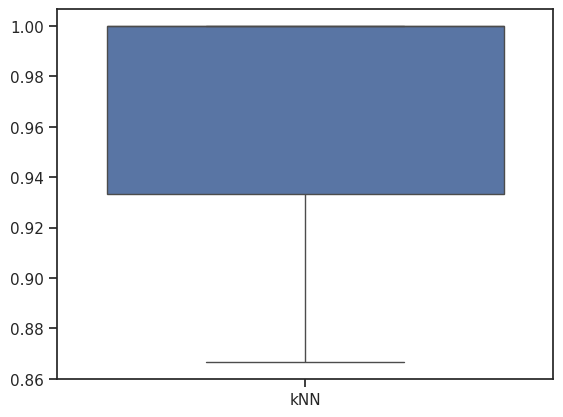

In [ ]:
# Visualisasi untuk mengevaluasi model dengan lebih baik lagi
df_ = pd.DataFrame({'kNN': scores_kNN})
p = sns.boxplot(data = df_)
min(scores_kNN)

###Regresi Logistik

In [ ]:
mulai = time.time()
scores_regLog = cross_val_score(reglog, df1, y1, cv=10) # perhatikan sekarang kita menggunakan seluruh data
waktu = time.time() - mulai
print("Accuracy Regresi Logistik: %0.2f (+/- %0.2f), Waktu = %0.3f detik" % (scores_regLog.mean(), scores_regLog.std() * 2, waktu))

Accuracy Regresi Logistik: 0.97 (+/- 0.07), Waktu = 0.395 detik


,0
kNN,0.866667
RegLog,0.933333


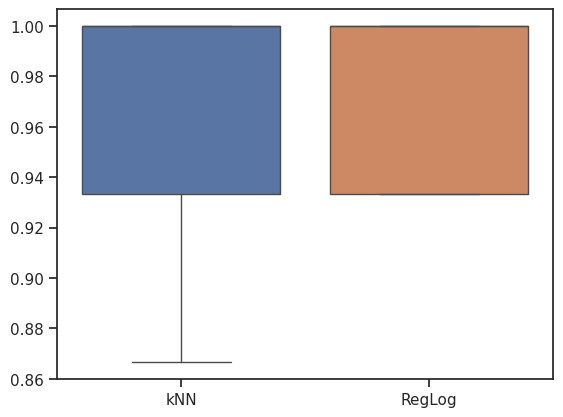

In [ ]:
# Visualisasi untuk mengevaluasi & membandingkan model dengan lebih baik lagi
df_ = pd.DataFrame({'kNN': scores_kNN, 'RegLog': scores_regLog})
p = sns.boxplot(data = df_)
df_.min()

###Naive Bayes

In [ ]:
mulai = time.time()
scores_nb = cross_val_score(nbc, df1, y1, cv=10) # perhatikan sekarang kita menggunakan seluruh data
waktu = time.time() - mulai
print("Accuracy Naive Bayes: %0.2f (+/- %0.2f), Waktu = %0.3f detik" % (scores_nb.mean(), scores_nb.std() * 2, waktu))

Accuracy Naive Bayes: 0.95 (+/- 0.09), Waktu = 0.135 detik


,0
kNN,0.866667
RegLog,0.933333
NaiveBys,0.866667


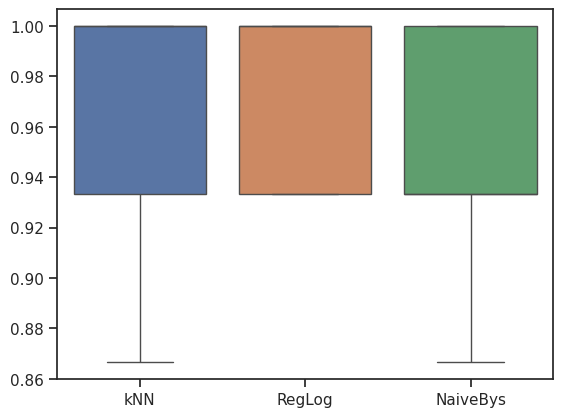

In [ ]:
# Visualisasi untuk mengevaluasi & membandingkan model dengan lebih baik lagi
df_ = pd.DataFrame({'kNN': scores_kNN, 'RegLog': scores_regLog, 'NaiveBys':scores_nb})
p = sns.boxplot(data = df_)
df_.min()

###Decision Tree

In [ ]:
mulai = time.time()
scores_dt = cross_val_score(DT, df1, y1, cv=10) # perhatikan sekarang kita menggunakan seluruh data
waktu = time.time() - mulai
print("Accuracy Decision Tree: %0.2f (+/- %0.2f), Waktu = %0.3f detik" % (scores_dt.mean(), scores_dt.std() * 2, waktu))

Accuracy Decision Tree: 0.96 (+/- 0.09), Waktu = 0.126 detik


,0
kNN,0.866667
RegLog,0.933333
NaiveBys,0.866667
DecTree,0.866667


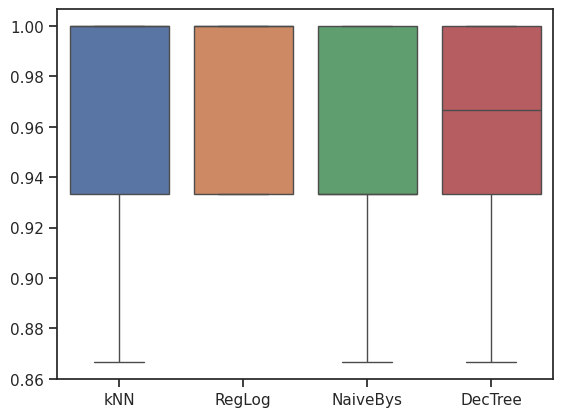

In [ ]:
# Visualisasi untuk mengevaluasi & membandingkan model dengan lebih baik lagi
df_ = pd.DataFrame({'kNN': scores_kNN, 'RegLog': scores_regLog, 'NaiveBys':scores_nb, "DecTree":scores_dt})
p = sns.boxplot(data = df_)
df_.min()

###Random Forest

In [ ]:
mulai = time.time()
scores_rf = cross_val_score(rf, df1, y1, cv=10) # perhatikan sekarang kita menggunakan seluruh data
waktu = time.time() - mulai
print("Accuracy Random Forest: %0.2f (+/- %0.2f), Waktu = %0.3f detik" % (scores_rf.mean(), scores_rf.std() * 2, waktu))

Accuracy Random Forest: 0.95 (+/- 0.12), Waktu = 3.916 detik


,0
kNN,0.866667
RegLog,0.933333
NaiveBys,0.866667
DecTree,0.866667
Forest,0.800000


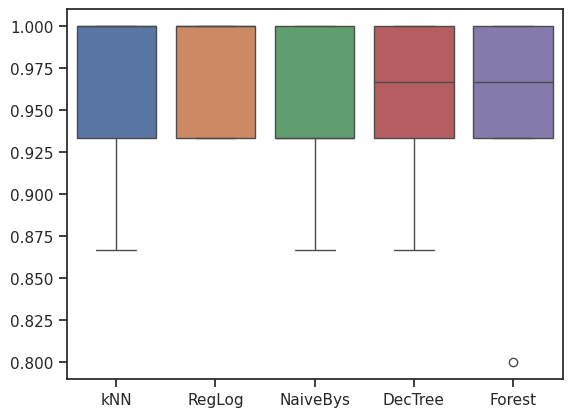

In [ ]:
# Visualisasi untuk mengevaluasi & membandingkan model dengan lebih baik lagi
df_ = pd.DataFrame({'kNN': scores_kNN, 'RegLog': scores_regLog, 'NaiveBys':scores_nb, "DecTree":scores_dt, "Forest": scores_rf})
p = sns.boxplot(data = df_)
df_.min()

###SVM

In [ ]:
dSVM = svm.SVC(C = 10**5, kernel = 'linear')
mulai = time.time()
scores_svm = cross_val_score(dSVM, df1, y1, cv=10) # perhatikan sekarang kita menggunakan seluruh data
waktu = time.time() - mulai
print("Accuracy SVM: %0.2f (+/- %0.2f), Waktu = %0.3f detik" % (scores_svm.mean(), scores_svm.std() * 2, waktu))

Accuracy SVM: 0.98 (+/- 0.09), Waktu = 0.473 detik


,0
kNN,0.866667
RegLog,0.933333
NaiveBys,0.866667
DecTree,0.866667
Forest,0.800000
SVM,0.866667


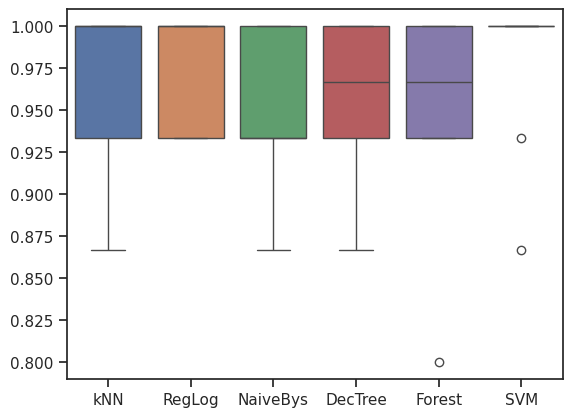

In [ ]:
# Visualisasi untuk mengevaluasi & membandingkan model dengan lebih baik lagi
df_['SVM'] = scores_svm
p = sns.boxplot(data = df_)
df_.min()

100%|██████████| 6/6 [00:10<00:00,  1.79s/it]


Regresi Logistik [1.0, 1.0, 1.0, 0.9333333333333333]
k-NN [1.0, 0.9333333333333333, 1.0, 1.0]
Naive Bayes [0.9333333333333333, 0.9333333333333333, 1.0, 0.9333333333333333]
Decision Tree [1.0, 0.9333333333333333, 1.0, 0.9333333333333333]
Random Forest [1.0, 0.9333333333333333, 1.0, 0.9333333333333333]
SVM [1.0, 0.9333333333333333, 1.0, 1.0]


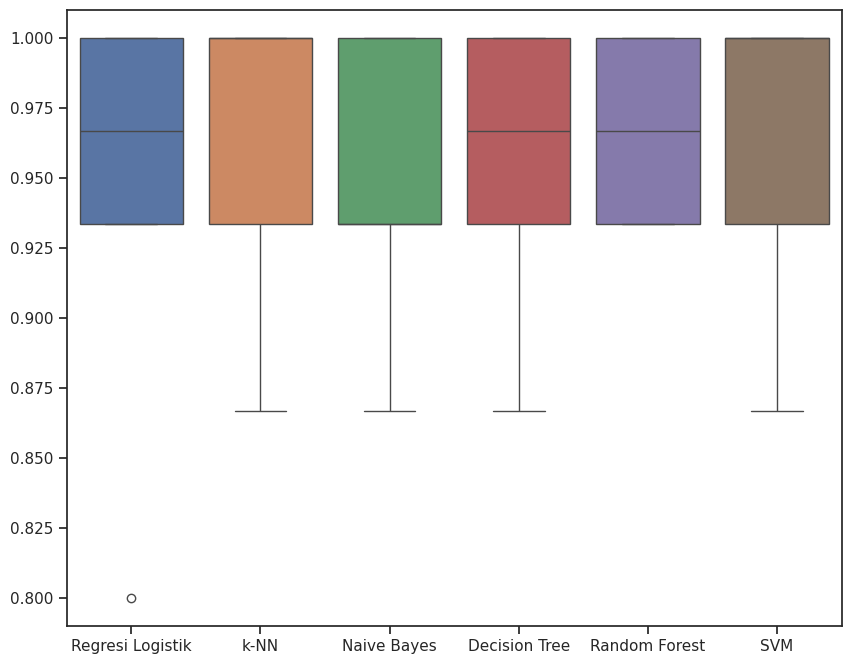

In [ ]:
clf = LogisticRegression(solver='liblinear')
kNN = neighbors.KNeighborsClassifier()
gnb = GaussianNB()
dt = tree.DecisionTreeClassifier()
rf = RandomForestClassifier()
svm_ = svm.SVC()

Models = [('Regresi Logistik', clf), ('k-NN',kNN), ('Naive Bayes',gnb), ('Decision Tree', dt), ('Random Forest', rf), ('SVM', svm_)]
Scores = {}
for model_name, model in tqdm(Models):
    Scores[model_name] = cross_val_score(model, df1, y1, cv=10, scoring='accuracy')

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
dt = pd.DataFrame.from_dict(Scores)
ax = sns.boxplot(data=dt, ax=ax)
for m, s in Scores.items():
    print(m, list(s)[:4])

##Hyperparameter Tuning

In [ ]:
# Hyperparameter optimization pada model kNN menggunakan gridCV
kCV = 10
metric = 'accuracy'
params = {}
params['kneighborsclassifier__n_neighbors'] = [1, 3, 5, 10, 15, 20, 25, 30]
params['kneighborsclassifier__weights'] = ('distance', 'uniform')

pipe = make_pipeline(neighbors.KNeighborsClassifier())
optKnn = GridSearchCV(pipe, params, cv=kCV, scoring=metric, verbose=1, n_jobs=-2) #
optKnn.fit(df1_train, y1_train)
print(optKnn.best_score_)
print(optKnn.best_params_)

Fitting 10 folds for each of 16 candidates, totalling 160 fits
0.9527272727272728
{'kneighborsclassifier__n_neighbors': 3, 'kneighborsclassifier__weights': 'distance'}


In [ ]:
# Contoh Hyperparameter optimization pada model SVM menggunakan RandomizedSearchCV
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
# Berikut ini contoh bagaimana mengetahui parameter yang dapat kita optimasi.
# Gunakan pengetahuan teori/analitik untuk mengoptimasi hanya parameter yang paling penting.
pipeSVM = make_pipeline(svm.SVC())
print(sorted(pipeSVM.get_params().keys()))

['memory', 'steps', 'svc', 'svc__C', 'svc__break_ties', 'svc__cache_size', 'svc__class_weight', 'svc__coef0', 'svc__decision_function_shape', 'svc__degree', 'svc__gamma', 'svc__kernel', 'svc__max_iter', 'svc__probability', 'svc__random_state', 'svc__shrinking', 'svc__tol', 'svc__verbose', 'verbose']


In [ ]:
# Optimal parameter SVM dengan RandomizedSearch
# WARNING cell ini butuh waktu komputasi cukup lama
kCV = 10
paramsSVM = {}
paramsSVM['svc__C'] = [1, 10, 100, 1000] #sp.stats.uniform(scale=100)
paramsSVM['svc__gamma'] = [0.1, 0.001, 0.0001, 1, 10]
paramsSVM['svc__kernel'] = ['rbf', 'sigmoid', 'linear'] # , 'poly'
optSvm = RandomizedSearchCV(pipeSVM, paramsSVM, cv=kCV, scoring=metric, verbose=2, n_jobs=-2) # refit=True, pre_dispatch='2*n_jobs' pre_dispatch min 2* n_jobs
optSvm.fit(df1_train, y1_train)
print(optSvm.best_score_)
print(optSvm.best_params_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] END ....svc__C=1000, svc__gamma=10, svc__kernel=sigmoid; total time=   0.0s
[CV] END ....svc__C=1000, svc__gamma=10, svc__kernel=sigmoid; total time=   0.0s
[CV] END ....svc__C=1000, svc__gamma=10, svc__kernel=sigmoid; total time=   0.0s
[CV] END ....svc__C=1000, svc__gamma=10, svc__kernel=sigmoid; total time=   0.0s
[CV] END ....svc__C=1000, svc__gamma=10, svc__kernel=sigmoid; total time=   0.0s
[CV] END ....svc__C=1000, svc__gamma=10, svc__kernel=sigmoid; total time=   0.0s
[CV] END ....svc__C=1000, svc__gamma=10, svc__kernel=sigmoid; total time=   0.0s
[CV] END ....svc__C=1000, svc__gamma=10, svc__kernel=sigmoid; total time=   0.0s
[CV] END ....svc__C=1000, svc__gamma=10, svc__kernel=sigmoid; total time=   0.0s
[CV] END ....svc__C=1000, svc__gamma=10, svc__kernel=sigmoid; total time=   0.0s
[CV] END ........svc__C=1, svc__gamma=1, svc__kernel=sigmoid; total time=   0.0s
[CV] END ........svc__C=1, svc__gamma=1, svc__

Accuracy kNN: 0.86 (+/- 0.45)
Accuracy SVM: 1.00 (+/- 0.00)


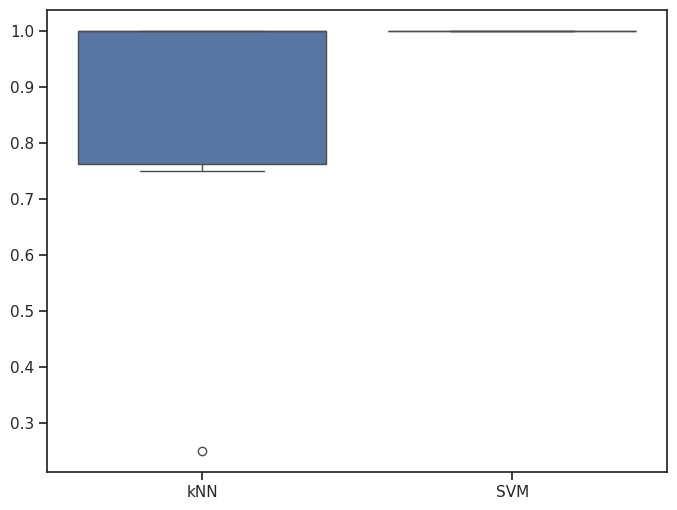

In [ ]:
kCV = 10
# Menggunakan parameter optimal
kNN = neighbors.KNeighborsClassifier(n_neighbors= 20, weights= 'uniform')
svm_ = svm.SVC(kernel= 'linear', gamma= 10, C= 10)

# Melakukan Cross Validasi
models = ['kNN', 'SVM']
knn_score = cross_val_score(kNN, df1_test, y1_test, cv=kCV, scoring='accuracy', n_jobs=-2, verbose=1)
svm_score = cross_val_score(svm_, df1_test, y1_test, cv=kCV, scoring='accuracy', n_jobs=-2, verbose=1)
scores = [knn_score, svm_score]

data = {m:s for m,s in zip(models, scores)}
for name in data.keys():
    print("Accuracy %s: %0.2f (+/- %0.2f)" % (name, data[name].mean(), data[name].std() * 2))

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
p = sns.boxplot(data=pd.DataFrame(data), ax=ax)

In [ ]:
# Saving Results untuk digunakan di module selanjutnya
from google.colab import drive
import pickle
drive.mount('/content/gdrive')
%cd /content/gdrive/MyDrive/kuliah/data mining dan business intelligence UI
pickle.dump(rf, open('model/data_Module-11.pckl', 'wb'))
"Done"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/kuliah/data mining dan business intelligence UI


'Done'

In [ ]:
# Mulai dengan Load Data dari Modul sebelumnya terlebih dahulu
%cd /content/gdrive/MyDrive/kuliah/data mining dan business intelligence UI
file_ = "model/data_Module-11.pckl"
f = open(file_, 'rb')
model = pickle.load(f)
f.close()

/content/gdrive/MyDrive/kuliah/data mining dan business intelligence UI


##Ensemble Model

In [ ]:
# Loading Modules
import warnings; warnings.simplefilter('ignore')
import pickle
import pandas as pd, matplotlib.pyplot as plt
import time, numpy as np, seaborn as sns
from sklearn import svm, preprocessing
from sklearn import  tree
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection
from collections import Counter
from tqdm import tqdm
sns.set(style="ticks", color_codes=True)
print(pd.__version__)
"Done"

2.2.2


'Done'

In [ ]:
# Contoh Voting (Bagging) di Python
# Catatan : Random Forest termasuk Bagging Ensemble (walau modified)
# Best practicenya Model yang di ensemble semuanya menggunakan Optimal Parameter

kNN = neighbors.KNeighborsClassifier(3)
kNN.fit(df1_train, y1_train)
Y_kNN = kNN.score(df1_test, y1_test)

DT = tree.DecisionTreeClassifier(random_state=1)
DT.fit(df1_train, y1_train)
Y_DT = DT.score(df1_test, y1_test)

model = VotingClassifier(estimators=[('k-NN', kNN), ('Decision Tree', DT)], voting='hard')
model.fit(df1_train, y1_train)
Y_Vot = model.score(df1_test, y1_test)

print('Akurasi k-NN', Y_kNN)
print('Akurasi Decision Tree', Y_DT)
print('Akurasi Voting', Y_Vot)

Akurasi k-NN 0.9555555555555556
Akurasi Decision Tree 0.9111111111111111
Akurasi Voting 0.8888888888888888


In [ ]:
# Averaging juga bisa digunakan di Klasifikasi (ndak hanya Regresi),
# tapi kita pakai probabilitas dari setiap kategori
T = tree.DecisionTreeClassifier()
K = neighbors.KNeighborsClassifier()
R = LogisticRegression()

T.fit(df1_train, y1_train)
K.fit(df1_train, y1_train)
R.fit(df1_train, y1_train)

y_T=T.predict_proba(df1_test)
y_K=K.predict_proba(df1_test)
y_R=R.predict_proba(df1_test)

Ave = (y_T+y_K+y_R)/3
print(Ave[:5]) # Print just first 5
prediction = [v.index(max(v)) for v in Ave.tolist()]
print(prediction[:5]) # Print just first 5
print('Akurasi Averaging', accuracy_score(y1_test, prediction))

[[7.18486143e-03 9.71159924e-01 2.16552151e-02]
 [2.86408333e-03 9.61942912e-01 3.51930048e-02]
 [9.87978400e-01 1.20214181e-02 1.81866854e-07]
 [1.27088530e-03 9.33664210e-01 6.50649042e-02]
 [5.87402834e-05 5.06262497e-01 4.93678763e-01]]
[1, 1, 0, 1, 1]
Akurasi Averaging 0.0


In [ ]:
# AdaBoost
num_trees = 100
kfold = model_selection.KFold(n_splits=10)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=33)
results = model_selection.cross_val_score(model, df1, y1, cv=kfold)
print(results.mean())

0.9133333333333333
